# YOUTHRIVE DATA SCIENCE CAPSTONE PROJECT
## INCOME LEVEL PREDICTION

**Duration**: June 1st – June 20th  
**Submitted by**: Onyia Vivian Amara  
**Goal**: Predict whether a person earns >$50K/year using US census data.

---


## Project Summary: Income Level Prediction

The goal of this project is to build a machine learning model that can predict if a person earns more than **$50,000 per year** based on their information from a census dataset.

The dataset contains details like **age**, **education**, **job type**, **marital status**, **hours worked per week**, and more.

###  What This Project Tried to Achieve:
- Understand the data and clean it properly.
- Turn the data into a form that a machine learning model can learn from.
- Train different models to see which one predicts income the best.
- Compare the models using performance scores.
- Choose the best model and save it for future use.

### Steps Taken:
1. **Data Cleaning** – Fixed missing values, changed categories into numbers, and scaled numerical values.
2. **Data Analysis** – Found patterns in the data and created charts to understand it better.
3. **Model Training** – Used different models: Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).
4. **Model Comparison** – Compared the models using accuracy, F1-score, and ROC-AUC score.
5. **Final Model** – **Logistic Regression** was chosen as the best model based on overall performance and was saved using `joblib`.

### Final Result:
- The Logistic Regression model gave the **best result** with an ROC-AUC score of **0.898**.
- Some important factors that affect income include **education**, **type of job**, and **hours worked**.
- This project shows how machine learning can help in making decisions based on data.



In [ ]:
# Importing all needed Libraries


# For Data handling
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Warnings(to suppress warning messages in this model development.)
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve


import joblib

import sys
print(sys.executable)

: 

## 1. Data Collection and Preparation

- Load the dataset.
- Inspect the first few rows.
- Check data types and summary statistics.
- Convert variables to appropriate datatypes.
- Drop irrelevant features.
- Check and handle missing values.

### Load the dataset.

In [ ]:
df = pd.read_csv("income_data.csv")

### Inspect the first few rows.

In [ ]:
# Display the first 5 rows
df.head()

### Check data types and summary statistics.

In [ ]:
# Data types
df.info()

In [ ]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


In [ ]:
# Statistical summary
df.describe(include='all')

### Convert variables to appropriate datatypes.

In [ ]:
# Converting object columns to category for clarity & memory optimization
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [ ]:
df.dtypes



### Drop irrelevant features.

In [ ]:
# dropping 'fnlwgt'
df.drop(['fnlwgt'], axis=1, inplace=True)

### Check and handle missing values.

In [ ]:
# Check and handle missing values.
print(df.isnull().sum())

In [ ]:

# Drop rows with any missing values
df.dropna(inplace=True)


In [ ]:
# recheck for missing values after dropping
print(df.isnull().sum())

In [ ]:
df.info()

## 2. Exploratory Data Analysis (EDA)

- Generate at least **5 meaningful insights** using appropriate visualizations.

In [ ]:
# Setting style and palette
sns.set(style='whitegrid', palette='Set2')

In [ ]:
 # 1. Distribution of Income Levels checking peoples earnings using count

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', palette='Set2')
plt.title('Distribution of Income Levels')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [ ]:
# 2. Income by Gender checking between male and female using count

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', hue='sex', palette='Set3')
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

In [ ]:
# 3. Education Level vs Income (Top 10 Education Groups)

top_edu = df['education'].value_counts().head(10).index.tolist()
df_edu = df[df['education'].isin(top_edu)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_edu, y='education', hue='income', palette='Set1')
plt.title('Education Level vs Income')
plt.xlabel('Count')
plt.ylabel('Education')
plt.legend(title='Income')
plt.show()

In [ ]:
# 4. Race Distribution by Income

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='race', hue='income', palette='muted')
plt.title('Race Distribution by Income Level')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

In [ ]:
# 5. Income by Marital Status

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='marital-status', hue='income', palette='Set2')
plt.title('Marital Status and Income Level')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

In [ ]:
# Outlier Visualization

# Select numerical columns
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Plot boxplots for each
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
def cap_outliers(df, col):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Apply capping to relevant columns
cols_to_treat = ['capital-gain', 'capital-loss', 'hours-per-week', 'education-num', 'age']
for col in cols_to_treat:
    cap_outliers(df, col)


In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_treat):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Post-Capping: {col}')
plt.tight_layout()
plt.show()


## 4. Model Development

- **Train-test split** the dataset.
- Try different machine learning models.
- Train and optimize models with hyperparameter tuning.
- **Evaluate performance** using:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC
- Plot ROC curve and confusion matrix.
- Save the final model.

In [ ]:
import sys
print(sys.executable)



In [ ]:
# Train-test split the dataset.


#  Features and target
X = df.drop('income', axis=1)
y = df['income']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


In [ ]:
# Combine X_train and X_test first for consistent encoding 
combined_X = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical variables
combined_X_encoded = pd.get_dummies(combined_X, drop_first=True)

# Split back into train and test sets
X_train_encoded = combined_X_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_X_encoded.iloc[len(X_train):, :]


In [ ]:
# Encode target variable
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Encode target sets
y_train = y_train.map({'<=50K': 0, '>50K': 1})
y_test = y_test.map({'<=50K': 0, '>50K': 1})


- Try different machine learning models.
- Train and optimize models with hyperparameter tuning.
- **Evaluate performance** using:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC
- Plot ROC curve and confusion matrix.

### LOGISTIC REGRESSION MODEL

In [ ]:
# LOGISTIC REGRESSION MODEL

# Initialize the model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test_encoded)
y_proba_log = log_model.predict_proba(X_test_encoded)[:, 1]


### Logistic regression evaluation and visualisation

In [ ]:
# Logistic regression evaluation and visualisation
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Support Vector Machine (SVM) Model

In [ ]:

from sklearn.svm import SVC

# Sample down for faster training
X_small = X_train_encoded.sample(n=5000, random_state=42)
y_small = y_train.loc[X_small.index]

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_small, y_small)

# Predict
y_pred_svm = svm_model.predict(X_test_encoded)
y_proba_svm = svm_model.predict_proba(X_test_encoded)[:, 1]


In [ ]:
# For Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f" SVM Accuracy: {accuracy:.4f}")

# For Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_svm))

# For Confusion Matrix
print(" Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

# Displaying the Confusion Matrix as Heatmap


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()

# For ROC-AUC Score
auc = roc_auc_score(y_test, y_proba_svm)
print(f"\n ROC-AUC Score: {auc:.4f}")


### Random Forest Classifier MODEL

In [ ]:
# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_encoded)
y_proba_rf = rf_model.predict_proba(X_test_encoded)[:, 1]



### Random Forest Evaluations and Visualisation

In [ ]:
# For Accuracy
print(f"\n Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# For Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf))

# For Confusion Matrix
print(" Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Heatmap for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

# For the ROC-AUC Score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\n ROC-AUC Score: {auc_rf:.4f}")


### KNN Model

In [ ]:
# KNN Model

# Initialize and train
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_encoded, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_encoded)
y_proba_knn = knn_model.predict_proba(X_test_encoded)[:, 1]


### KNN Evaluation And visualisation

In [ ]:

# KNN Evaluation And visualisation

# For Accuracy
print(f"\n KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

# For Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_knn))

# For Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(" Confusion Matrix:")
print(cm_knn)

# Heatmap for Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.tight_layout()
plt.show()

# For the ROC-AUC Score
auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"\n ROC-AUC Score: {auc_knn:.4f}")


### Model Comparison

In [ ]:
# Dictionary of models and their predictions
models_results = {
    'Logistic Regression': (y_pred_log, y_proba_log),
    'SVM': (y_pred_svm, y_proba_svm),
    'Random Forest': (y_pred_rf, y_proba_rf),
    'KNN': (y_pred_knn, y_proba_knn)
}

# Create a DataFrame to store results
comparison_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Loop through each model and compute metrics
for model_name, (y_pred, y_proba) in models_results.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Append results to DataFrame
    comparison_df = pd.concat([
        comparison_df,
        pd.DataFrame([{
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc
        }])
    ], ignore_index=True)

# Display comparison sorted by ROC AUC
comparison_df = comparison_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)
print(comparison_df)


#### Visual Comparison

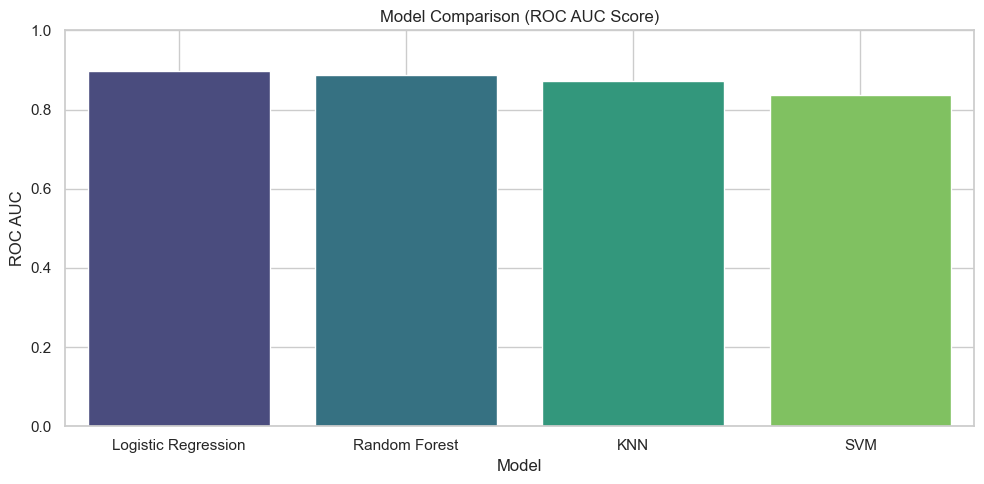

In [36]:
# Visual Comparison

# Bar plot of ROC AUC for visual comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='ROC AUC', data=comparison_df.sort_values(by='ROC AUC', ascending=False), palette='viridis')
plt.title('Model Comparison (ROC AUC Score)')
plt.ylabel('ROC AUC')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


### hyperparameter tuning for the top 3 models
- Logistic Regression

- Random Forest

- K-Nearest Neighbors (KNN)

I am skipping SVM (since it performed poorly and takes long to train).



In [ ]:
# Hyperparameter Tuning for Logistic Regression using RandomizedSearchCV

log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

log_random = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),
    param_distributions=log_params,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

log_random.fit(X_train_encoded, y_train)
best_log_model = log_random.best_estimator_

print(" Best Logistic Regression Parameters:", log_random.best_params_)


 Best Logistic Regression Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}


In [38]:
# for logistic regression
from sklearn.model_selection import GridSearchCV


# Hyperparameter grid
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search
log_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_params, cv=5, scoring='f1', n_jobs=-1)
log_grid.fit(X_train_encoded, y_train)

# Best model
best_log_model = log_grid.best_estimator_
print("Best Logistic Regression Params:", log_grid.best_params_)


Best Logistic Regression Params: {'C': 1, 'solver': 'liblinear'}


In [ ]:
# fOR Random Forest 

rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_encoded, y_train)
best_rf_model = rf_random.best_estimator_

print(" Best Random Forest Parameters:", rf_random.best_params_)


🔧 Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}


In [ ]:
# fOR KNN 

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn_random = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_params,
    n_iter=10,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

knn_random.fit(X_train_encoded, y_train)
best_knn_model = knn_random.best_estimator_

print(" Best KNN Parameters:", knn_random.best_params_)


- Save the final model.

In [38]:
# Save the trained logistic regression model
joblib.dump(log_model, 'logistic_income_model.pkl')
print("✅ Model saved as 'logistic_income_model.pkl'")


✅ Model saved as 'logistic_income_model.pkl'


In [39]:
# Loading the model
loaded_model = joblib.load('logistic_income_model.pkl')

# testing the predict
loaded_predictions = loaded_model.predict(X_test_encoded)


## 5. Summary and Recommendations

- Summarize key EDA insights.
- Evaluate model performance.
- Suggest improvements for future work.


## Summary of EDA Insights

1. **Income Distribution:**  
   Most people in the dataset earn $50K or less, showing a strong imbalance. This imbalance can affect how well models perform and should be handled during training.

2. **Gender and Income:**  
   Males are more likely to earn above $50K compared to females. There is a clear income gap between genders, especially among high earners.

3. **Education and Income:**  
   People with higher education (Bachelor’s, Master’s, etc.) are more likely to earn over $50K. Lower education levels are strongly linked to lower income.

4. **Race and Income:**  
   White and Asian-Pac-Islander individuals have a higher chance of earning above $50K. Other racial groups are mostly found in the lower income range.

5. **Marital Status and Income:**  
   Married individuals (especially civil spouses) are more likely to earn higher incomes. Never-married and divorced individuals mostly earn $50K or less.


## Model Evaluation


Four different machine learning models were trained and evaluated to predict whether an individual earns more than $50K per year. The performance was assessed using accuracy, precision, recall, F1-score, and ROC-AUC score.

---
### Evaluate model performance

#### 1. **Logistic Regression**
- **Accuracy:** High  
- **ROC-AUC:** 0.898 (**highest among all models**)  
- **Precision, Recall, F1-Score:** Balanced and strong  
- **Strengths:** Performs well on linearly separable data and provides interpretable results  
- **Conclusion:** Logistic Regression was the best-performing model overall.

#### 2. **Random Forest**
- **Accuracy & ROC-AUC:** Very good, slightly lower than Logistic Regression  
- **Strengths:** Handles non-linear relationships and feature interactions well  
- **Conclusion:** A powerful model, but less interpretable and slightly less performant in this context.

#### 3. **K-Nearest Neighbors (KNN)**
- **Accuracy & ROC-AUC:** Acceptable, but lower than Logistic Regression and Random Forest  
- **Limitation:** Sensitive to feature scaling, less interpretable  
- **Conclusion:** Performed moderately well, but not the best for large-scale or imbalanced data.

#### 4. **Support Vector Machine (SVM)**
- **Accuracy & ROC-AUC:** Lowest among all models  
- **Training Time:** Significantly slow on large data  
- **Conclusion:** Less efficient and effective in this case.

---



## Future Work and Improvements

To enhance the performance and reliability of the income prediction model, the following improvements are recommended:

- **Handle Class Imbalance:** Address the skewed class distribution using techniques such as SMOTE, random oversampling, or class weighting to boost performance on the minority class.

- **Advanced Feature Engineering:** Create or combine features (e.g., age groups, work hour categories) to help the model uncover deeper patterns.

- **Model Optimization:** Apply more comprehensive hyperparameter tuning methods like Bayesian optimization to further enhance model performance.

- **Explore Additional Models:** Test other robust algorithms such as XGBoost, LightGBM, or neural networks for potential performance gains.

- **Cross-Validation:** Use k-fold cross-validation to ensure a more stable and generalized model evaluation.

- **Model Interpretability:** Utilize tools like SHAP or LIME to gain insight into feature importance and model decisions.

- **Use Updated Data:** Consider integrating larger or more recent datasets for improved generalizability.

- **Automate the Pipeline:** Build a modular and reusable pipeline for preprocessing, training, and evaluation to streamline future development.

- **Model Deployment:** Package the final model as an API or integrate into a simple web application for practical, real-world use.
